In [6]:
%matplotlib inline

## [ THREE ]
Assume a gravitational lens that is a point source. Using the lens equation:

\begin{equation}
    \beta = \theta - \frac{D_{LS}}{D_{S}D_{L}} \frac{4GM}{c^{2}\theta}
\end{equation}

Write a program to lens a background source by a foreground mass. Have the program produce a set of two figures: one with the position of the background source relative to the lens and a second figure with the resulting lensed image. Generate these images for two configurations: (a) where the background source is almost directly behind the lens and (b) when the background source is just inside the Einstein radius of the lens.

For added credit, use an image of distant galaxies from Hubble and appy your lens to the astronomical scene.

Hint: think about what values you should chose for the mass of the lens and the distance to the lens and source, and also how you should trace the path of the photon (from the source to the observer or the observer to the source). 

/Users/danielleskinner/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in divide


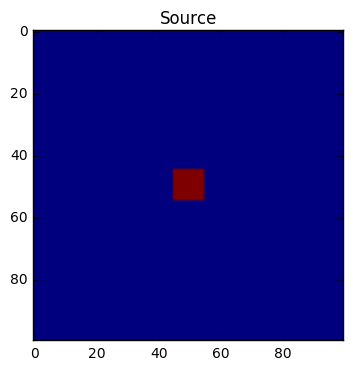

theta_E =  27.7847213544
theta_pos at center (should be theta_E) =  27.7847213544
theta_pos_source at center =  27.7847213544


/Users/danielleskinner/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:99: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 100

In [7]:
import numpy as np
from numpy import linalg as LA
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pylab import *
import scipy
from PIL import Image, ImageFilter
from decimal import Decimal

#Define my variables:
c = 3.0 * (10**8)
G = 6.67 * (10**-11)
d = 1
s = 1./2.
d_s = 1./2.
M = 6e+18
angles = np.linspace(0, 2*np.pi, 500)

#Equation for theta_E in arcseconds
def einstein_ring(d, s, d_s, M):
    theta_E = np.sqrt(((4*G*M)/(c**2)) * ((d_s)/(d*s)))/(4.8*10**(-6))
    return theta_E
#pixel/deg

def circle_eqn(x,y,r,phi):
    x_coord = x + r*np.cos(phi)
    y_coord = y + r*np.sin(phi)
    outline = np.array([x_coord, y_coord])
    return outline

#Setting up source 
z = np.zeros((100,100))
a = np.zeros((100,100))
n = np.zeros((100,100))
x,y = np.meshgrid(np.arange(z.shape[0]), np.arange(z.shape[1]))
x_cen = x[50][50]
y_cen = y[50][50]

#Distance to every pixel of source image from the center 
beta = np.sqrt((x-x_cen)**2 + (y-y_cen)**2)
angle = np.sin((y-y_cen) / beta)

#Source
z[45:55,45:55] = 1
#z[np.where(beta<10)] = 1
#Practice source with all pixel values filled
a[np.where(beta<500)] = 1
a[np.where(beta<10)] = 10

#print 'beta of source = ' , beta[np.where(z==1)]

#Distance to every pixel from the center in the source image
beta_source = beta[np.where(z==1)]

#Angles of the above distances
angle_source = angle[np.where(z==1)]

Phi = np.linspace(0, 2*np.pi, 100)

#Plot source image
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(z)
ax.set_aspect('equal')
plt.title('Source')
plt.show()

#General solution
print 'theta_E = ', einstein_ring(d, s, d_s, M)
theta_pos = (1./2.)*(beta + np.sqrt(np.power(beta,2) + 4*(einstein_ring(d, s, d_s, M)**2)))
theta_neg = (1./2.)*(beta - np.sqrt(np.power(beta,2) + 4*(einstein_ring(d, s, d_s, M)**2)))
print 'theta_pos at center (should be theta_E) = ', theta_pos[x_cen][y_cen]

#Solution for my source
theta_pos_source = (1./2.)*(beta_source + np.sqrt(np.power(beta_source,2) + 4*(einstein_ring(d, s, d_s, M)**2)))
theta_neg_source = (1./2.)*(beta_source - np.sqrt(np.power(beta_source,2) + 4*(einstein_ring(d, s, d_s, M)**2)))
print 'theta_pos_source at center = ', theta_pos[x_cen][y_cen]

#x and y positions of the general lensed image.
theta_pos_x = theta_pos*np.cos(angle) + x_cen
theta_pos_y = theta_pos*np.sin(angle) + y_cen
theta_neg_x = theta_neg*np.cos(angle) + x_cen
theta_neg_y = theta_neg*np.sin(angle) + y_cen

#x and y positions of the lensed image, where the pixel value should = 1 in the source image
theta_source_x = theta_pos_source*np.cos(angle_source) + x_cen
theta_source_y = theta_pos_source*np.sin(angle_source) + y_cen
theta_source_neg_x = theta_neg_source*np.cos(angle_source) + x_cen
theta_source_neg_y = theta_neg_source*np.sin(angle_source) + y_cen

#Einstein ring 
einstein_ring = [circle_eqn(x_cen, y_cen, einstein_ring(d, s, d_s, M), phi) for phi in Phi]

#loop through every pixel in the source image, set it equal to one at the positions in theta_source_x and y
for i in range(len(theta_source_x)):
    for j in range(len(theta_source_y)):
        x0 = theta_source_x[i]
        y0 = theta_source_y[j]
        n[x0][y0] = 1.0

for k in range(len(theta_source_neg_x)):
    for l in range(len(theta_source_neg_y)):
        x0 = theta_source_neg_x[k]
        y0 = theta_source_neg_y[l]
        n[x0][y0] = 1.0

#Lensed image
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(n)
ax.set_aspect('equal')
ax.plot(*zip(*einstein_ring), label='Einstein Ring')
plt.title('Lensed')
plt.legend()
plt.show()

#Beginning attempt of lensing a real image
img = mpimg.imread('/Users/danielleskinner/Desktop/Hubble_deep.jpg')
new_image = img[:,:,0]


I was able to calculate the solution to the lens equation for theta (going from the source to the lensed image, theta_pos_source and theta_neg_soure above is the distance from the center of the lensed image to each pixel where in my source image, the pixel value was one), but I had difficulty trying to map the pixel values to a location. I tried to loop through every pixel in the newly lensed image (n), and at all the positions of theta_source_x and theta_source_y within n, set the pixel value equal to one, as those pixels would correspond with the original image. For some reason my loop won't work, and it throws this index error but I'm not sure why, as I am able to call the pixel values of n, n[x0][y0], using n[theta_source_x[0]][theta_source_y[0]]. Something in my loop is broken.. 

If I could get my loop to work, I would have my lensed image. I'm so looking forward to seeing the solution; I lost many hours over this! 